In [1]:
# Lab | Imbalanced data
# We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

# Instructions
# 1. Load the dataset and explore the variables.

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Usuari\Downloads\customer_churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df[df["Churn"].notna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# Suponiendo que tienes un DataFrame llamado df
# Verificar qué columnas tienen valores NaN
columnas_con_nan = df.columns[df.isnull().any()].tolist()

# Imprimir las columnas con valores NaN
print("Columnas con NaN:", columnas_con_nan)

Columnas con NaN: []


In [6]:
# Contar el número de filas con al menos un valor NaN
filas_con_nan = df.isnull().any(axis=1).sum()

# Imprimir el número de filas con NaN
print("Número de filas con NaN:", filas_con_nan)

Número de filas con NaN: 0


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
var_numericas=df.select_dtypes(include=["int64"])
var_categoricass=df.select_dtypes(exclude=["int64"])

In [9]:
# 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Supongamos que tienes un DataFrame llamado df con la variable de respuesta 'Churn' y las variables predictoras 'tenure', 'SeniorCitizen' y 'MonthlyCharges'

# Convertir valores categóricos 'Yes' y 'No' a valores numéricos
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Definir las variables predictoras (X) y la variable de respuesta (y)
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = df['Churn']

# Añadir una constante a las variables predictoras para el término de intercepción
X = sm.add_constant(X)

# Crear el modelo de regresión logística
modelo = sm.Logit(y, X)

# Ajustar el modelo a los datos
resultado = modelo.fit()

# Imprimir el resumen del modelo
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.449478
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:                  0.2232
Time:                        18:04:01   Log-Likelihood:                -3165.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7927      0.087    -20.651      0.000      -1.963      -1.623
tenure           

In [11]:
# 3.Extract the target variable.
# 4.Extract the independent variables and scale them.
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called df with target variable 'Churn' and independent variables 'tenure', 'SeniorCitizen', and 'MonthlyCharges'

# Extract the target variable 'Churn'
y = df['Churn']

# Extract the independent variables and scale them
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the scaled independent variables

In [12]:
# 5. from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# Supongamos que y_pred es tu array de predicciones
# Contar cuántos valores son iguales a 1
cantidad_de_unos = np.count_nonzero(y_pred == 1)

# Contar cuántos valores son iguales a 0
cantidad_de_ceros = np.count_nonzero(y_pred == 0)

# Imprimir los resultados
print("Cantidad de valores iguales a 1 en y_pred:", cantidad_de_unos)
print("Cantidad de valores iguales a 0 en y_pred:", cantidad_de_ceros)

Cantidad de valores iguales a 1 en y_pred: 259
Cantidad de valores iguales a 0 en y_pred: 1150


In [15]:
# 6. Evaluate the model.
from sklearn.metrics import confusion_matrix

# Suponiendo que tienes las etiquetas verdaderas (y_test) y las predicciones (y_pred)
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

Matriz de Confusión:
[[958  78]
 [192 181]]


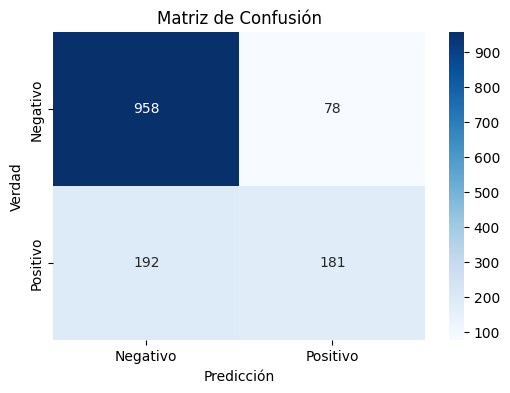

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes la matriz de confusión
# matriz_confusion = ...

# Definir etiquetas para los ejes
etiquetas = ['Negativo', 'Positivo']

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.title('Matriz de Confusión')
plt.show()

Precisión: 0.6988416988416989
Sensibilidad (Recall): 0.48525469168900803
F1-Score: 0.5727848101265823


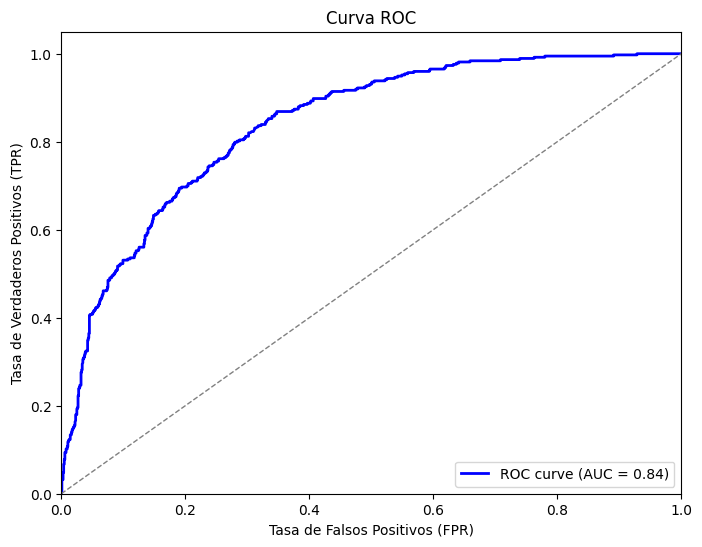

Área bajo la curva ROC (AUC-ROC): 0.8390618692227272


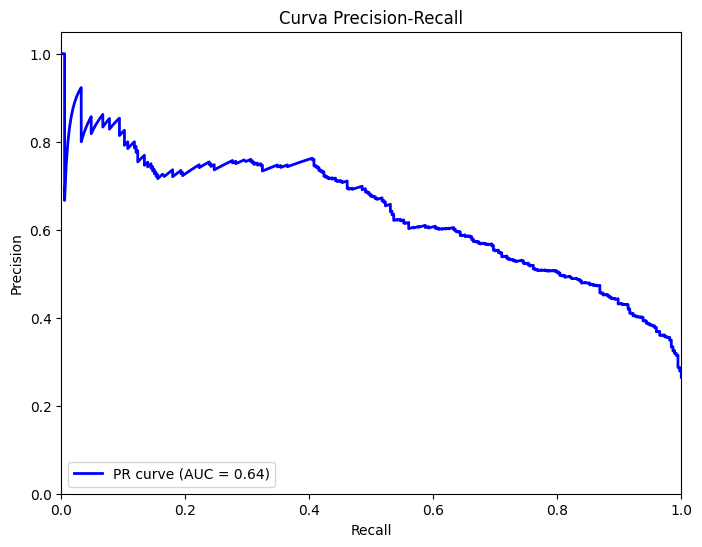

Área bajo la curva Precision-Recall (AUC-PR): 0.6409091444547288


In [17]:
from sklearn.metrics import precision_score, recall_score

# Suponiendo que tienes las etiquetas verdaderas (y_test) y las predicciones (y_pred)
# Calcular la precisión
precision = precision_score(y_test, y_pred)

# Calcular el recall (sensibilidad)
recall = recall_score(y_test, y_pred)

# Imprimir los resultados
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)

from sklearn.metrics import f1_score

# Suponiendo que tienes las etiquetas verdaderas (y_test) y las predicciones (y_pred)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred)

# Imprimir el resultado
print("F1-Score:", f1)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular las probabilidades de clase
probas = logreg.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probas)

# Calcular el Área bajo la curva ROC (AUC-ROC)
auc_roc = roc_auc_score(y_test, probas)

# Plotear la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Imprimir el valor del AUC-ROC
print("Área bajo la curva ROC (AUC-ROC):", auc_roc)


from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calcular la Precisión y Recall
precision, recall, _ = precision_recall_curve(y_test, probas)

# Calcular el Área bajo la curva Precision-Recall (AUC-PR)
auc_pr = average_precision_score(y_test, probas)

# Plotear la Curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % auc_pr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

# Imprimir el valor del AUC-PR
print("Área bajo la curva Precision-Recall (AUC-PR):", auc_pr)


7. Even a simple model will give us more than 70% accuracy. Why?Even a simple model will give us more than 70% accuracy. Why?

Un alto puntaje de precisión, incluso con un modelo simple, puede ocurrir por varias razones:

    1.  Desequilibrio de clases: Si el conjunto de datos está altamente desequilibrado, lo que significa que una clase (generalmente la clase mayoritaria) supera significativamente a las otras clases, un modelo simple puede lograr una alta precisión al predecir la clase mayoritaria la mayor parte del tiempo. Por ejemplo, si el 90% de las muestras pertenecen a la clase A y solo el 10% pertenecen a la clase B, un modelo que predice todas las muestras como clase A lograría el 90% de precisión. Sin embargo, esta alta precisión no necesariamente indica un buen rendimiento, especialmente si la clase minoritaria (clase B) es de mayor interés.
    
    2. Separabilidad lineal: Algunos conjuntos de datos son inherentemente fáciles de clasificar porque las clases están bien separadas. Incluso modelos lineales simples como la regresión logística o las máquinas de vectores de soporte (SVM) lineales pueden lograr una alta precisión en tales conjuntos de datos.
    
    3. Calidad de las características: Si las características en el conjunto de datos son altamente informativas y se correlacionan directamente con la variable objetivo, incluso un modelo simple puede explotar esta información para hacer predicciones precisas.

    4. Azar: En algunos casos, un modelo simple puede tener un buen desempeño por azar, especialmente en conjuntos de datos pequeños o ruidosos.
    
    5. Sobreajuste: Aunque menos común con modelos simples, el sobreajuste aún puede ocurrir. Si el modelo tiene demasiada flexibilidad o complejidad en relación con el tamaño o el nivel de ruido de los datos, puede ajustar el ruido en los datos de entrenamiento y no generalizar bien a datos no vistos. En tales casos, la precisión reportada puede ser demasiado optimista cuando se evalúa en un conjunto de prueba separado.

    6. Es importante considerar estos factores y no depender únicamente de la precisión al evaluar el rendimiento del modelo. A menudo es útil examinar métricas adicionales como la precisión, el recall, la puntuación F1, el ROC-AUC o el PR-AUC para obtener una comprensión más completa del rendimiento de un modelo, especialmente en casos de desequilibrio de clases o al considerar los objetivos específicos de la tarea.

In [20]:
!pip3 install upgrade scikit-learn

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds 
# new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.7410628019323672
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1021
           1       0.74      0.74      0.74      1049

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070

